In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

In [2]:
plt.rcParams['figure.figsize'] = (20, 15)

In [3]:
infile_qcd = open('qcd_100000_pt_250_500.pkl','rb')
infile_higgs = open('higgs_100000_pt_250_500.pkl','rb')

d_qcd = pickle.load(infile_qcd)
d_higgs = pickle.load(infile_higgs)

# Lab 7/8

In this lab we will be performing the event selection optimization explicitly.

1. Let's start by making a stacked histogram plots of our features. We'll leave out phi as phi is uniformly distributed for both signal and background (shown in lab 5) so it is not an effective metric for distinguishing between background and signal. Starting with mass, let's evaluate the expected significance prior to performing any event selection.

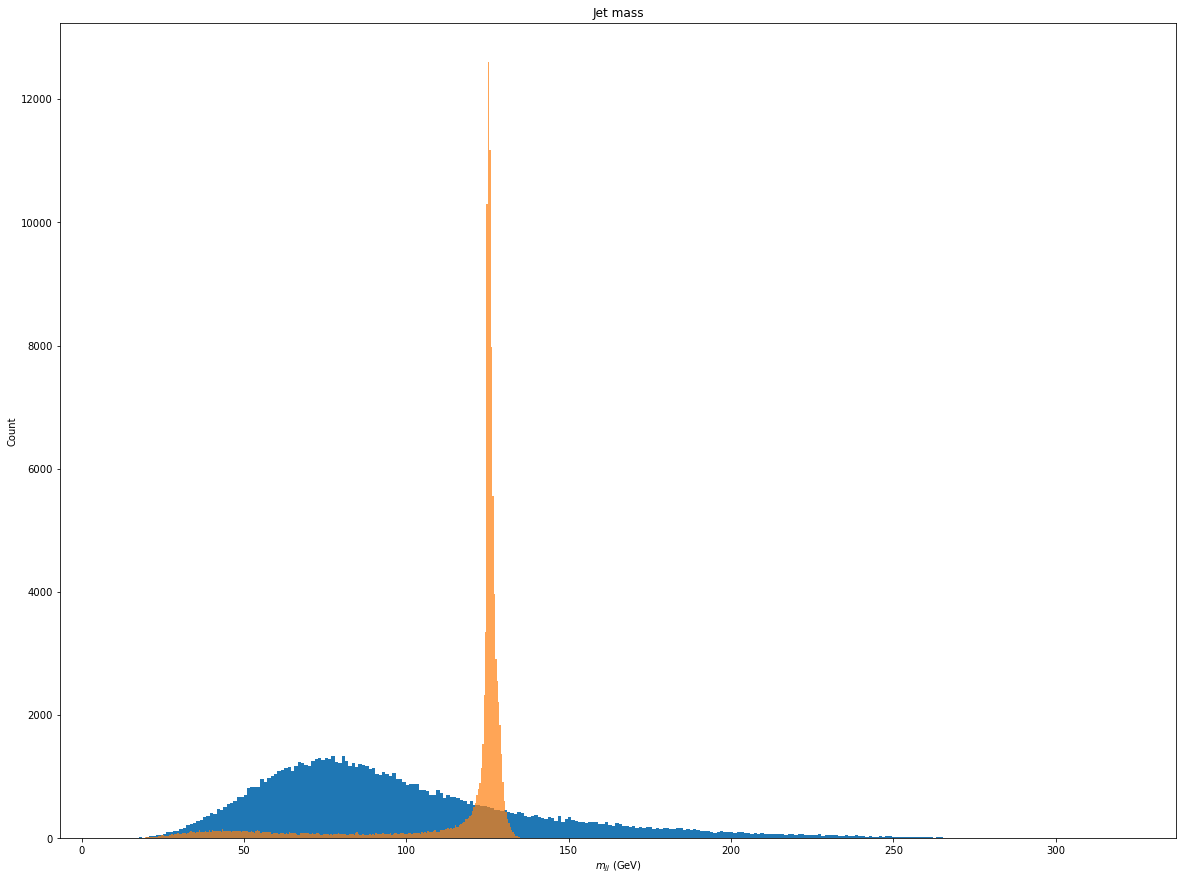

In [4]:
plt.hist(d_qcd['mass'], 300)
plt.hist(d_higgs['mass'], 300, alpha = 0.7)
plt.title('Jet mass')
plt.ylabel('Count')
plt.xlabel('$m_{jj}$ (GeV)')
plt.show()

In [5]:
qcd_m_mean = np.mean(d_qcd['mass'])
higgs_m_mean = np.mean(d_higgs['mass'])
prob = stats.poisson.cdf(higgs_m_mean, qcd_m_mean)
sig = stats.norm.ppf(prob)
x_sig = 100/np.sqrt(20000)
print('Significance: {:.4} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 1.667 Expected Significance: 0.707


It's not at first intuitive that the calculated significance of the jet mass is higher than the expected significance. However, this can be attributed to the fact that the expected significance is for the entire dataset, including all features. This indicates that mass is a feature with a better than average discovery sensitivity relative to other features. Furthermore, given that there is no presence of signal with an observed mass higher than ~140-145, cuts can be made to the background to further increase this sensitivity. Let's try to put this cut into place:

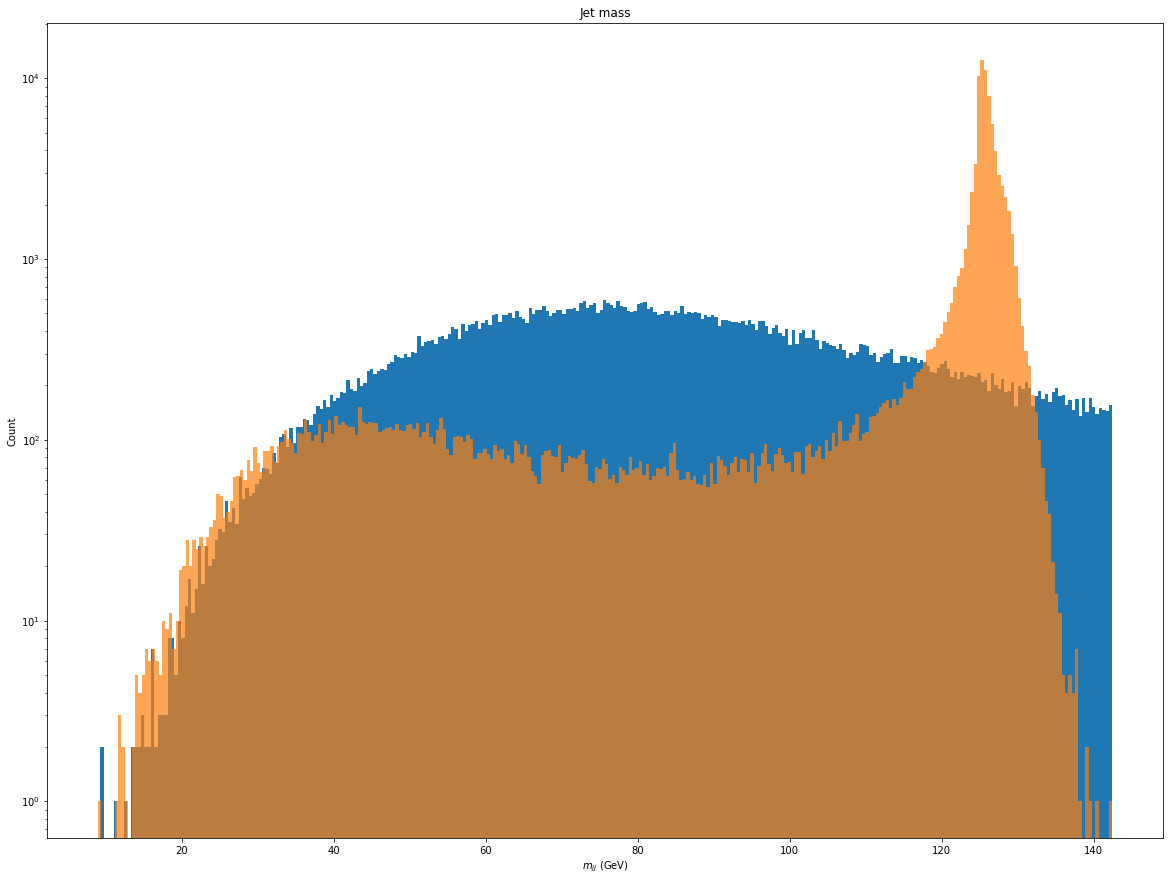

In [6]:
mass_cut_q_i = np.where(d_qcd['mass'] < max(list(d_higgs['mass'])))

plt.hist([d_qcd['mass'][x] for x in mass_cut_q_i], 300)
plt.hist(d_higgs['mass'], 300, alpha=0.7)
plt.yscale('log')
plt.title('Jet mass')
plt.ylabel('Count')
plt.xlabel('$m_{jj}$ (GeV)')
plt.show()

In [7]:
qcd_m_mean_cut = np.mean([d_qcd['mass'][x] for x in mass_cut_q_i])
higgs_m_mean_cut = np.mean(d_higgs['mass'])
prob = stats.poisson.cdf(higgs_m_mean_cut, qcd_m_mean_cut)
sig = stats.norm.ppf(prob)
x_sig = 100/np.sqrt(20000)
print('Significance: {:.4} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 3.2 Expected Significance: 0.707


By removing any events with $m_{jj} \geq 145$, we can see that we have increased the discovery sensitivity to 3.135, an increase of ~1.5. Since this cut has proven so effective, we can also compare how the significance using other features changes if we remove events due to the mass of the jet as we work through them. For now, let's next inspect the transverse momentum.

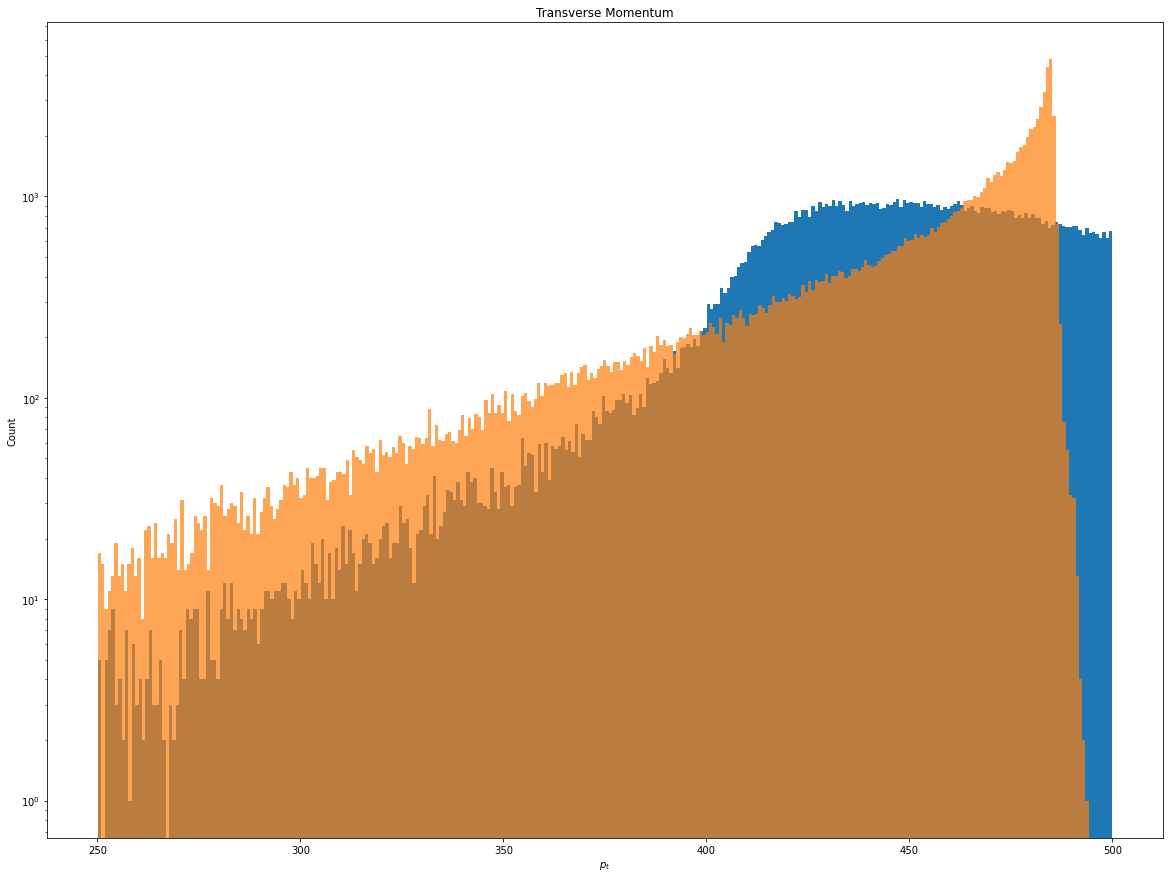

In [8]:
plt.hist(d_qcd['pt'], 300)
plt.hist(d_higgs['pt'], 300, alpha = 0.7)
plt.yscale('log')
plt.title('Transverse Momentum')
plt.ylabel('Count')
plt.xlabel('$p_t$')
plt.show()

In [9]:
qcd_pt_mean = np.mean(d_qcd['pt'])
higgs_pt_mean = np.mean(d_higgs['pt'])
prob = stats.poisson.cdf(higgs_pt_mean, qcd_pt_mean)
sig = stats.norm.ppf(prob)
print('Significance: {:.3} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 0.0927 Expected Significance: 0.707


Unfortunately, with $p_t$ there isn't a significant way to make cuts that would exclusively remove background data and the significance using the transverse momentum isn't very high either. Depending on one's tolerance for removing potential signal data, one could make cuts towards the left where the higgs count is greater than the qcd count. By doing so, one would increase the higgs mean more quickly than the qcd mean and increase the sensitivity in that way, though one risks the possibility that there is signal in the region you're removing. In addition, since we have only 100,000 points, it's still within reasonability that any cut we make to signal region could remove a useful value, and given how rare signal events are it would be best to avoid that path. Regardless, let's see how the significance determined by $p_t$ changes if we remove events with the mass cuts we made earlier.

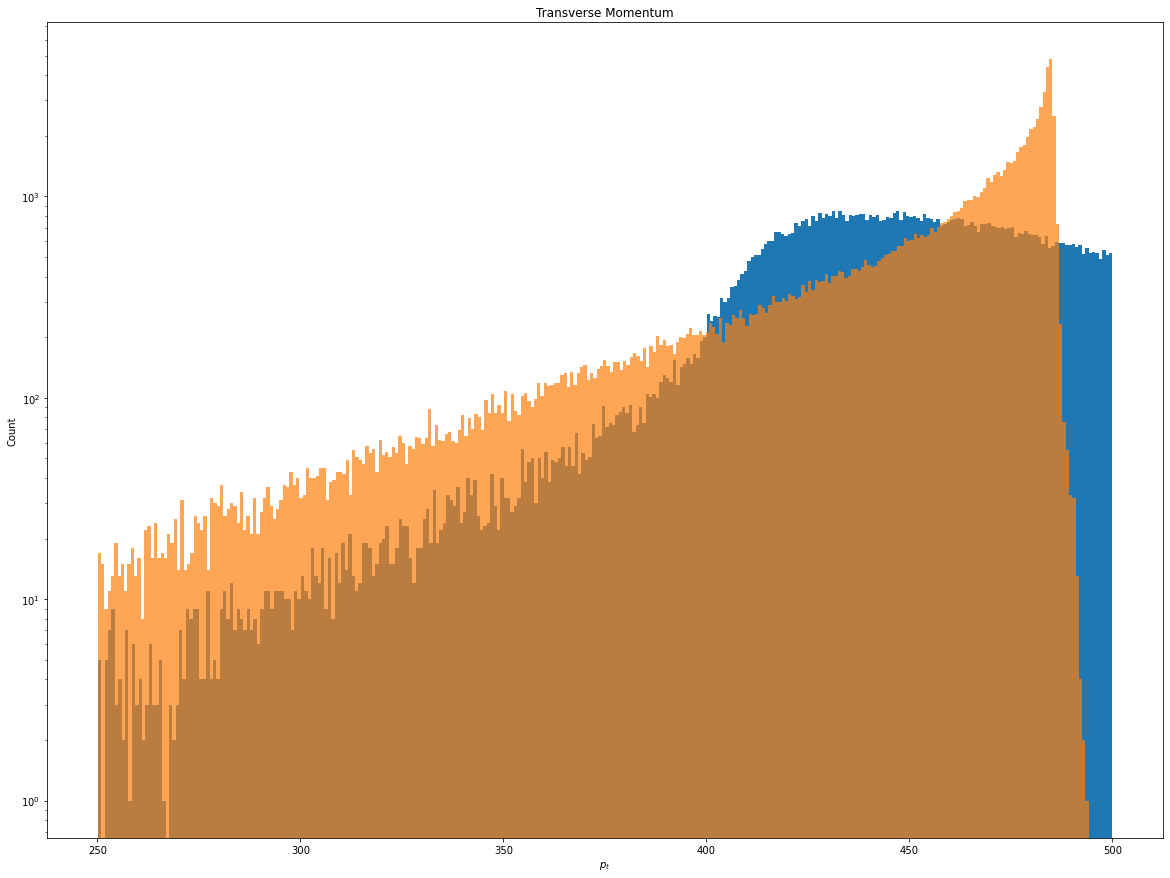

In [10]:
plt.hist([d_qcd['pt'][x] for x in mass_cut_q_i], 300)
plt.hist(d_higgs['pt'], 300, alpha = 0.7)
plt.yscale('log')
plt.title('Transverse Momentum')
plt.ylabel('Count')
plt.xlabel('$p_t$')
plt.show()

In [11]:
qcd_pt_mean_cut = np.mean([d_qcd['pt'][x] for x in mass_cut_q_i])
higgs_pt_mean_cut = np.mean(d_higgs['pt'])
prob = stats.poisson.cdf(higgs_pt_mean_cut, qcd_pt_mean_cut)
sig = stats.norm.ppf(prob)
print('Significance: {:.3} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 0.144 Expected Significance: 0.707


It seems that there is not a high enough correlation between mass and transverse momentum to affect a large change in the significance calculated from transverse momentum. As such, it seems that the transverse momentum will not be a useful feature in and of itself when optimizing discovery sensitivity. However, we will still use this feature later as a metric to evaluate the different cuts we will be making. Next, let's inspect the energy coefficient values, as they showed promise during the initial feature exploration.

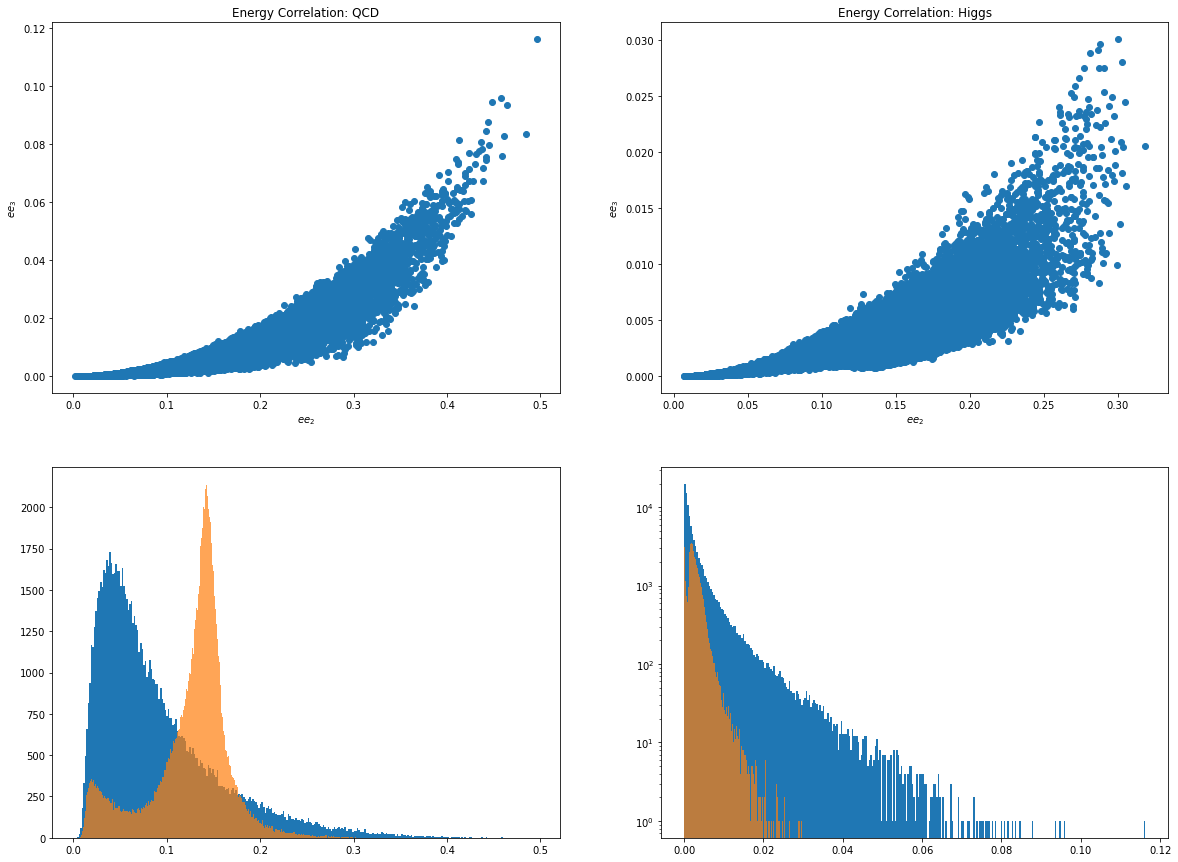

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.scatter(d_qcd['ee2'],d_qcd['ee3'])
ax2.scatter(d_higgs['ee2'],d_higgs['ee3'])
ax3.hist(d_qcd['ee2'], 300)
ax3.hist(d_higgs['ee2'], 300, alpha=0.7)
ax4.hist(d_qcd['ee3'], 300)
ax4.hist(d_higgs['ee3'], 300, alpha=0.7)
ax4.set_yscale('log')
ax1.set_title('Energy Correlation: QCD')
ax2.set_title('Energy Correlation: Higgs')
ax1.set_xlabel('$ee_2$')
ax1.set_ylabel('$ee_3$')
ax2.set_xlabel('$ee_2$')
ax2.set_ylabel('$ee_3$')
plt.show()

Since the feature $D_2$ is a measure of $e_3/(e_2)^3$, it is also useful to compare to this metric as well.

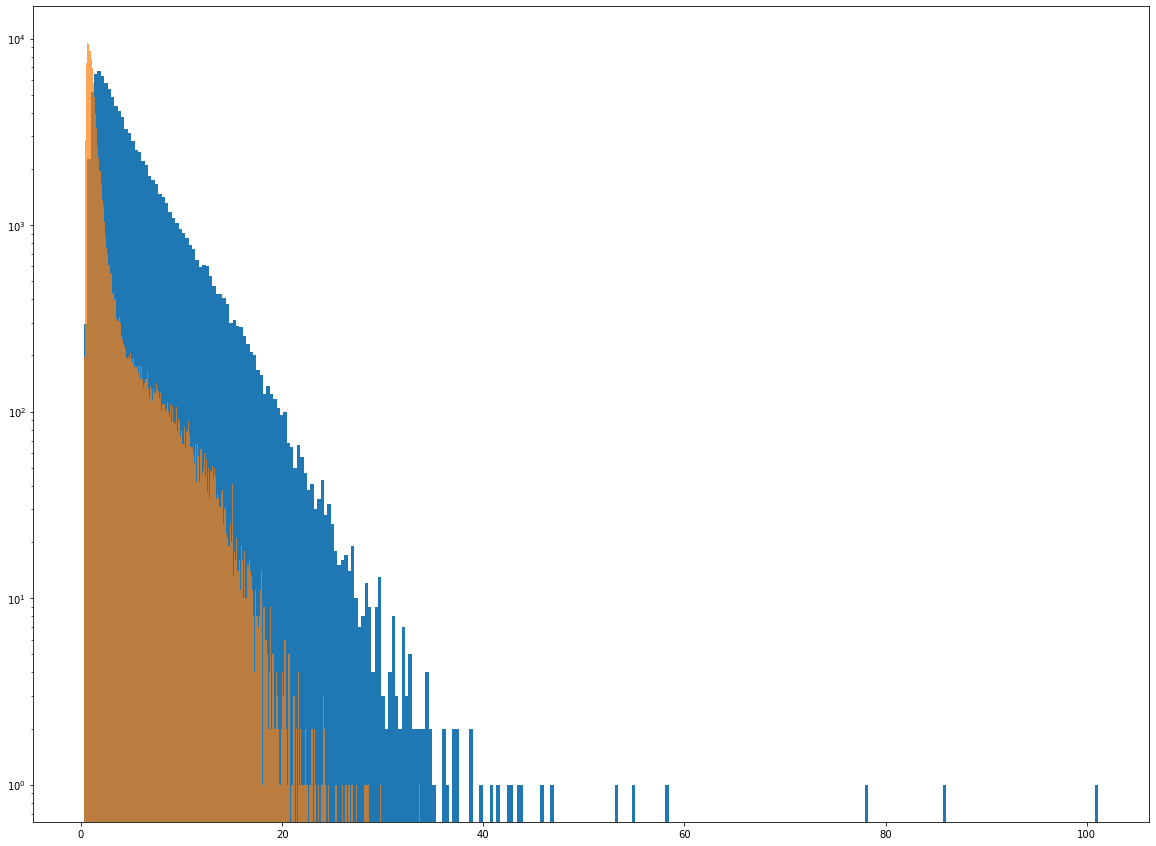

In [13]:
plt.hist(d_qcd['d2'], 300)
plt.hist(d_higgs['d2'], 300, alpha=0.7)
plt.yscale('log')
plt.show()

There are certainly small cuts that can be made to all of $e_2$, $e_3$, and $D_2$, but it's seems from inspection that the upper most $D_2$ contour defined by $e_3/(e_2)^3$ has smaller values in higgs than in the qcd background. I'll try to fit a contour first to the higgs dataset and see if any points on the qcd scatter of $e_2$ vs $e_3$ lie above this curve.

In [14]:
# Fit to curve chooses highest ratios, for whatever reason this ratio is quadratic rather than a third degree polynomial as the D2 contour would suggest.
h_ratio = list(np.array(d_higgs['ee3'])/(np.array(d_higgs['ee2'])**2))
d_2_sorted = h_ratio.copy()
d_2_sorted.sort(reverse=True)
fit_vals_i = []
for x in d_2_sorted[:50]:
    fit_vals_i.append(h_ratio.index(x))
    h_ratio[fit_vals_i[-1]] = 0

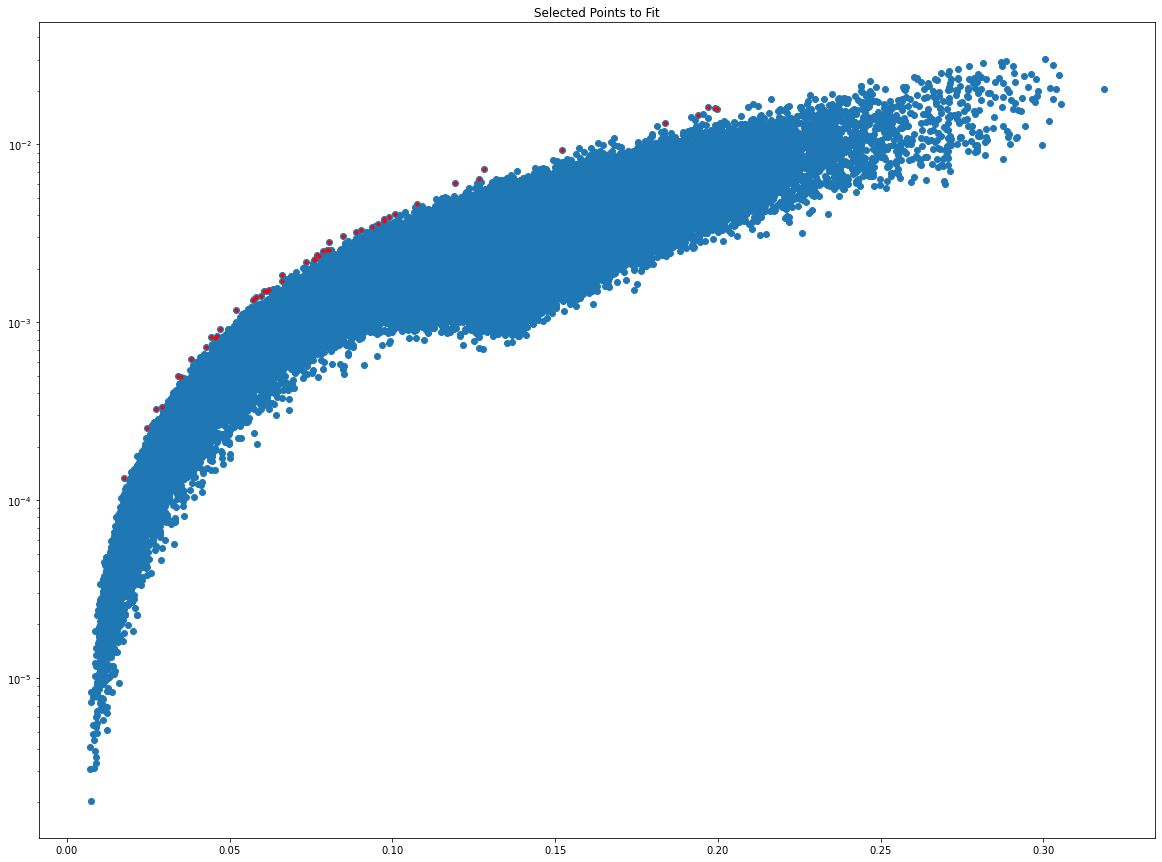

In [15]:
plt.scatter(d_higgs['ee2'],d_higgs['ee3'])
plt.plot([d_higgs['ee2'][x] for x in fit_vals_i],[d_higgs['ee3'][x] for x in fit_vals_i], '.r')
plt.yscale('log')
plt.title('Selected Points to Fit')
plt.show()

Parameters([('a', <Parameter 'a', value=0.3968780845937794 +/- 0.00859, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=0.001193151143155013 +/- 0.00196, bounds=[-inf:inf]>), ('c', <Parameter 'c', value=-3.367094509905213e-05 +/- 9.27e-05, bounds=[-inf:inf]>)])


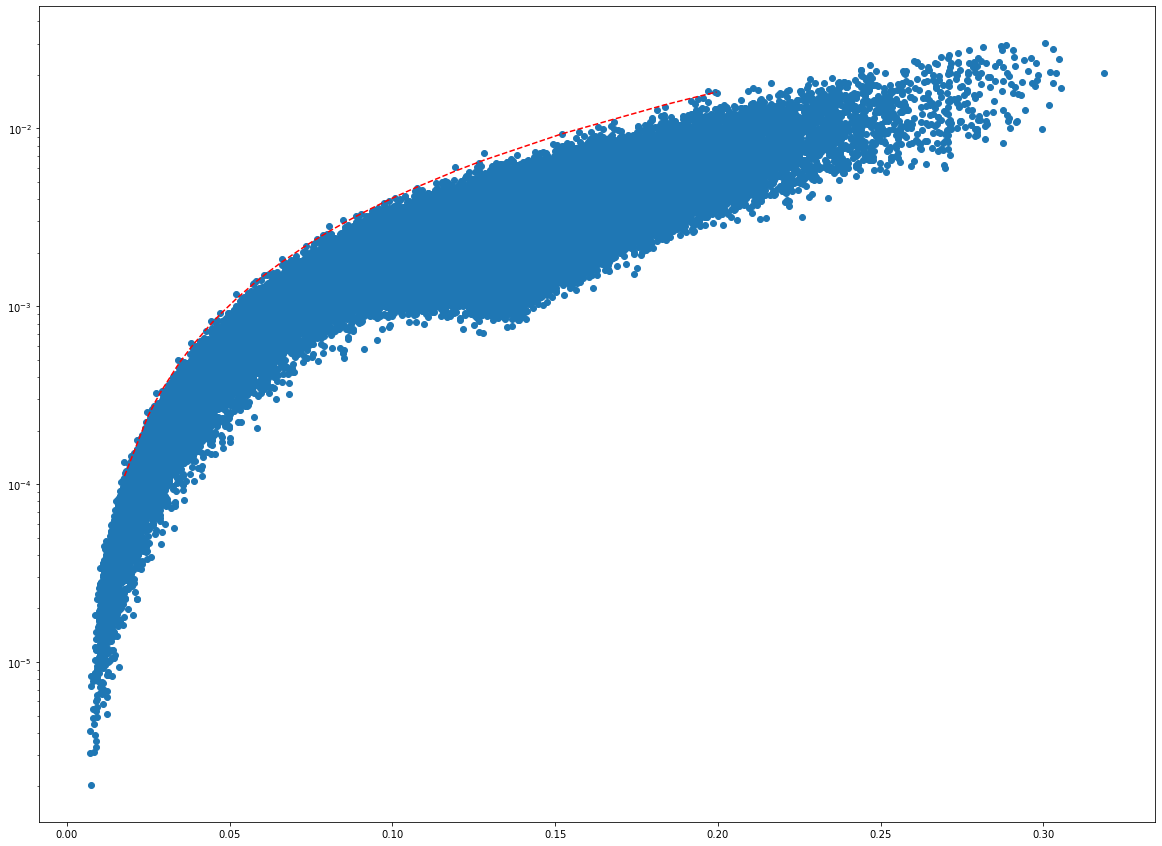

In [16]:
import lmfit

model = lmfit.models.QuadraticModel()
result = model.fit(np.sort([d_higgs['ee3'][x] for x in fit_vals_i]), x=np.sort([d_higgs['ee2'][x] for x in fit_vals_i]))
print(result.params)
plt.scatter(d_higgs['ee2'],d_higgs['ee3'])
plt.plot(np.sort([d_higgs['ee2'][x] for x in fit_vals_i]),result.best_fit, '--r')
plt.yscale('log')
plt.show()

From here, I'll adjust the constant term slightly so that no higgs points are excluded from any cuts made. Ideally I'd fit a curve perfectly that passes through the outlier that lies farthest outside the curve to better optimize the cut made using this curve, however in the interest of time this should still do fine.

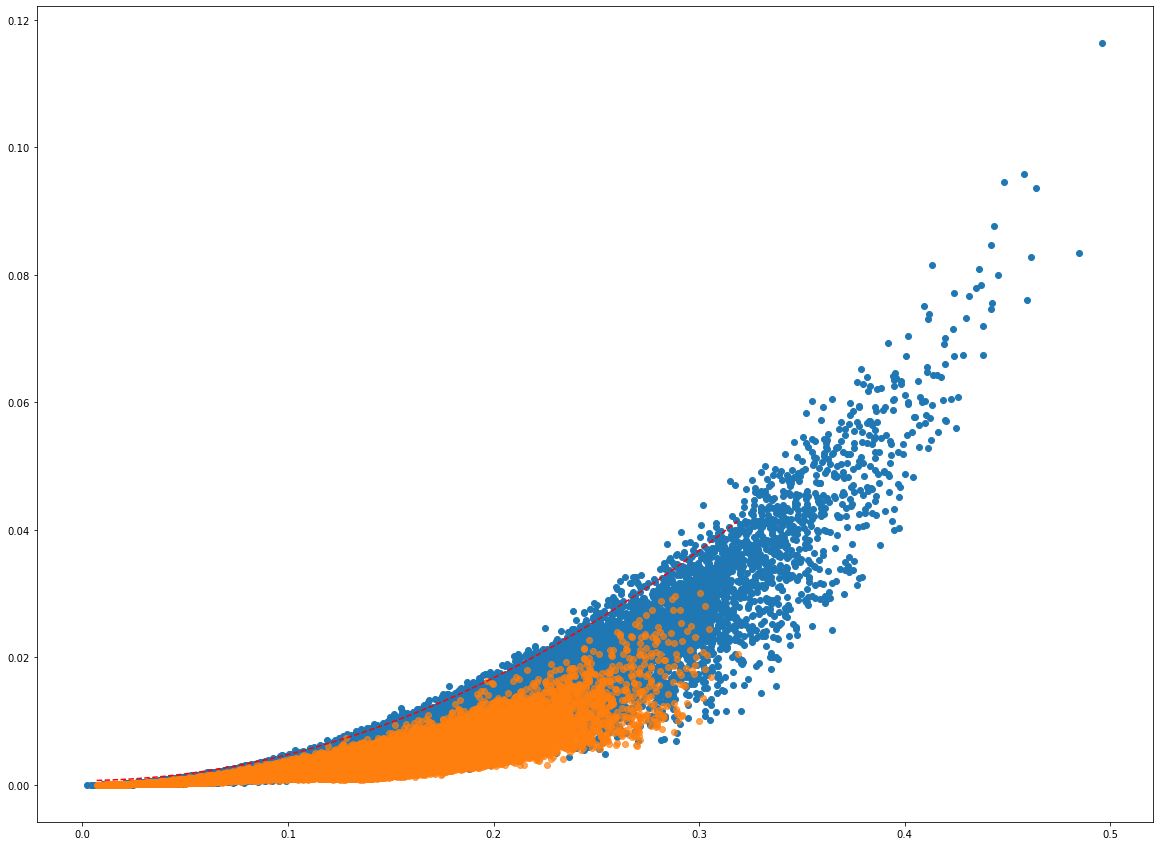

In [17]:
new_c = 0.00065
x_vals = np.linspace(np.min(d_higgs['ee2']),np.max(d_higgs['ee2']),1000)
plt.scatter(d_qcd['ee2'],d_qcd['ee3'])
plt.scatter(d_higgs['ee2'],d_higgs['ee3'], alpha=0.7)
plt.plot(x_vals, [result.params['a'].value*x**2 + result.params['b'].value*x + new_c for x in x_vals], '--r')
plt.show()

Now let's make cuts based on the curve we came up with, as well as the maximum and minimum values of $ee_2$ and $ee_3$ and see how this affects the significance using the transverse momentum as a baseline.

In [18]:
ee_3_i = np.where((d_qcd['ee3'] < max(list(d_higgs['ee3']))) & (d_qcd['ee3'] < [(result.params['a'].value*x**2) + (result.params['b'].value*x) + new_c for x in d_qcd['ee2']]))
ee_2_i = np.where((d_qcd['ee2'] > min(list(d_higgs['ee2']))) & (d_qcd['ee2'] < max(list(d_higgs['ee2']))))
ee_i = np.unique(np.append(ee_3_i, ee_2_i))
ee_i.shape

(99325,)

So it seems I did all that work for an at most ~1400 event improvement... the curve also only cuts around 200 indices... Regardless, let's put the cuts into place and see if we see any improvement on the transverse momentum mapping.

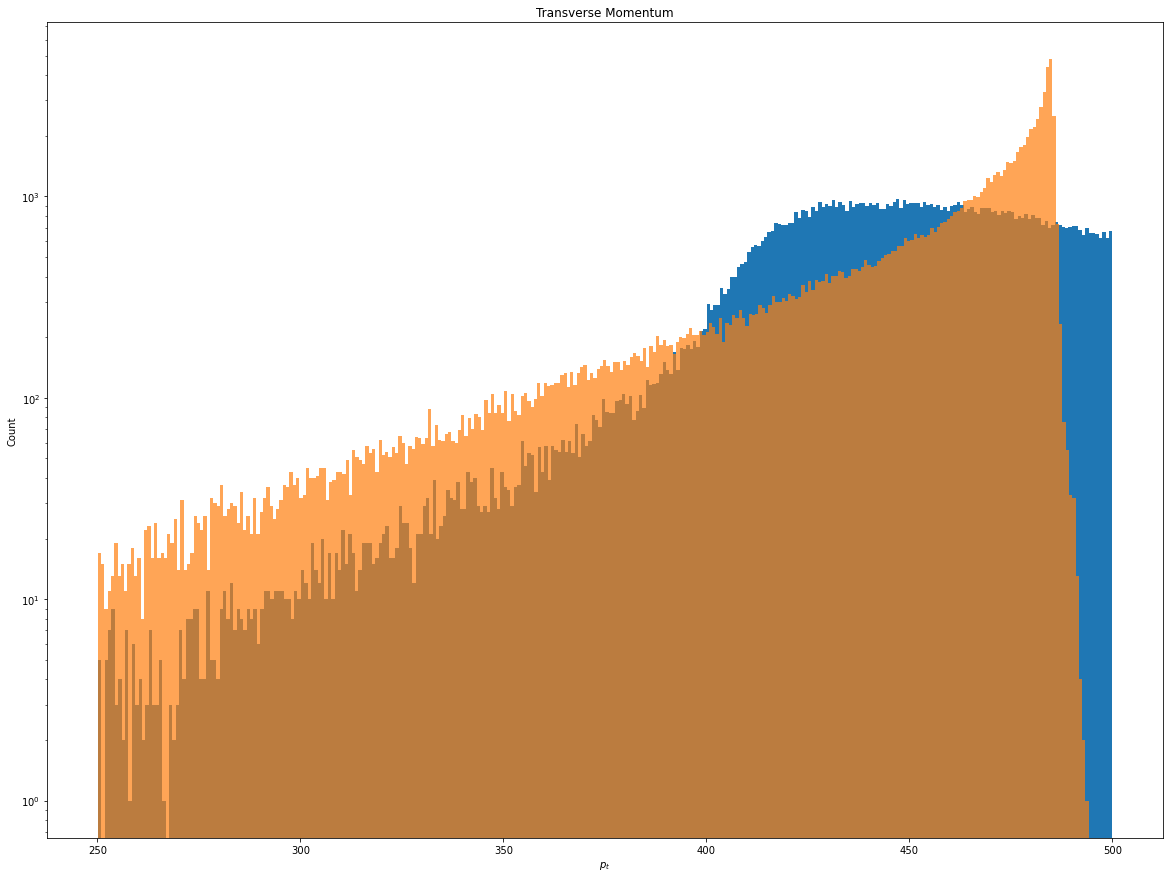

In [19]:
plt.hist([d_qcd['pt'][x] for x in ee_i], 300)
plt.hist(d_higgs['pt'], 300, alpha = 0.7)
plt.yscale('log')
plt.title('Transverse Momentum')
plt.ylabel('Count')
plt.xlabel('$p_t$')
plt.show()

In [20]:
qcd_ee_mean_cut = np.mean([d_qcd['pt'][x] for x in ee_i])
higgs_ee_mean_cut = np.mean(d_higgs['pt'])
prob = stats.poisson.cdf(higgs_ee_mean_cut, qcd_ee_mean_cut)
sig = stats.norm.ppf(prob)
print('Significance: {:.3} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 0.0888 Expected Significance: 0.707


It also seems that based on our metric of significance that these cuts actually manage to reduce our significance by a small amount. This indicates that the cuts we made were to high $p_t$ events, which is unfortunate. In this case, it's better not to use energy correlation metrics when performing cuts, at least in the way that was performed here. Up to this point, I've tried anything I thought could make significant changes to the discovery sensitivity without removing ANY potential signal. I attempted training a classifier to find signal within background, however it was unable to learn anything significant about the features and was effectively flipping coins. Furthermore, the calculated significance using these small cuts is still quite low. Given this, I believe I need to make more aggressive cuts. Doing so increases the risk of eliminating signal, however without doing so I cannot find a way to find any statistically significant signal candidates, so the risk appears to be worth it.

What seems to make mass such an effective discriminator is that the signal peak is both steep and located far away from the background peak. Features that satisfy this condition are $\tau_2$, $\tau_3$, $\tau_{21}$ and to a certain degree, $k_t\Delta R$. I'm hesitant to make aggressive cuts to that feature since the higgs data shares a secondary peak with the background, however $\tau_2$, $\tau_3$, and $\tau_{21}$ seem like strong candidates. Let's start with $\tau_2$

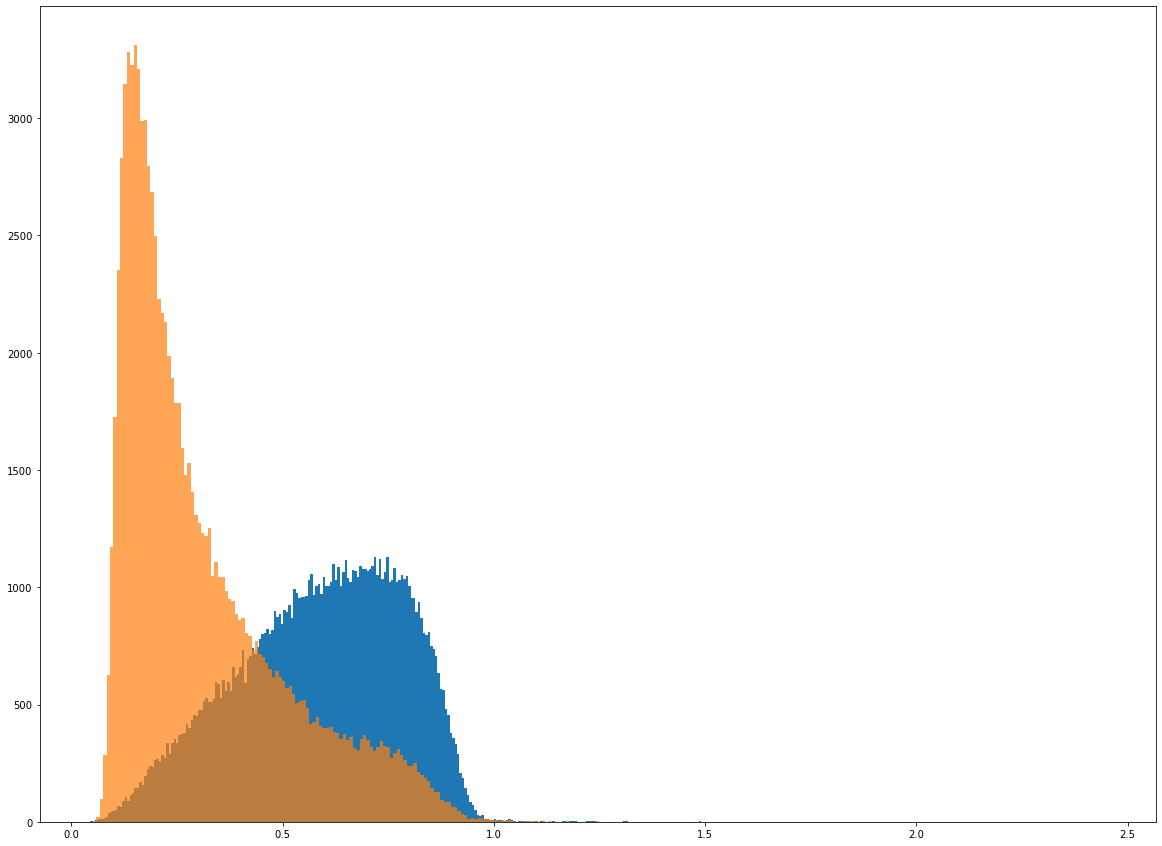

In [21]:
plt.hist(d_qcd['t2'], 300)
plt.hist(d_higgs['t2'], 300, alpha=0.7)
plt.show()

In [22]:
tau_2_qcd_i = np.where((d_qcd['t2'] >= 0.15) & (d_qcd['t2'] < 0.22))
tau_2_h_i = np.where((d_higgs['t2'] >= 0.15) & (d_higgs['t2'] < 0.22))
qcd_mean = np.mean([d_qcd['t2'][x] for x in tau_2_qcd_i])
higgs_mean = np.mean([d_higgs['t2'][x] for x in tau_2_h_i])
prob = stats.poisson.cdf(higgs_mean, qcd_mean)
sig = stats.norm.ppf(prob)
old_prob = stats.poisson.cdf(np.mean(d_higgs['t2']),np.mean(d_qcd['t2']))
old_sig = stats.norm.ppf(old_prob)
x_sig = 100/np.sqrt(20000)
print('Significance pre cut: {:.3} Significance: {:.3} Expected Significance: {:.3}'.format(old_sig, sig, x_sig))

Significance pre cut: 0.136 Significance: 0.944 Expected Significance: 0.707


Based on the findings here, $\tau_2$ is also an effective discriminator between signal and background when using cuts, and significance seems to increase as one pushes the cut towards the 0. My only worry is that the remaining signal will be so small that it will be hard to differentiate between itself and background, so it may be reasonable to dial the cut back somewhat.

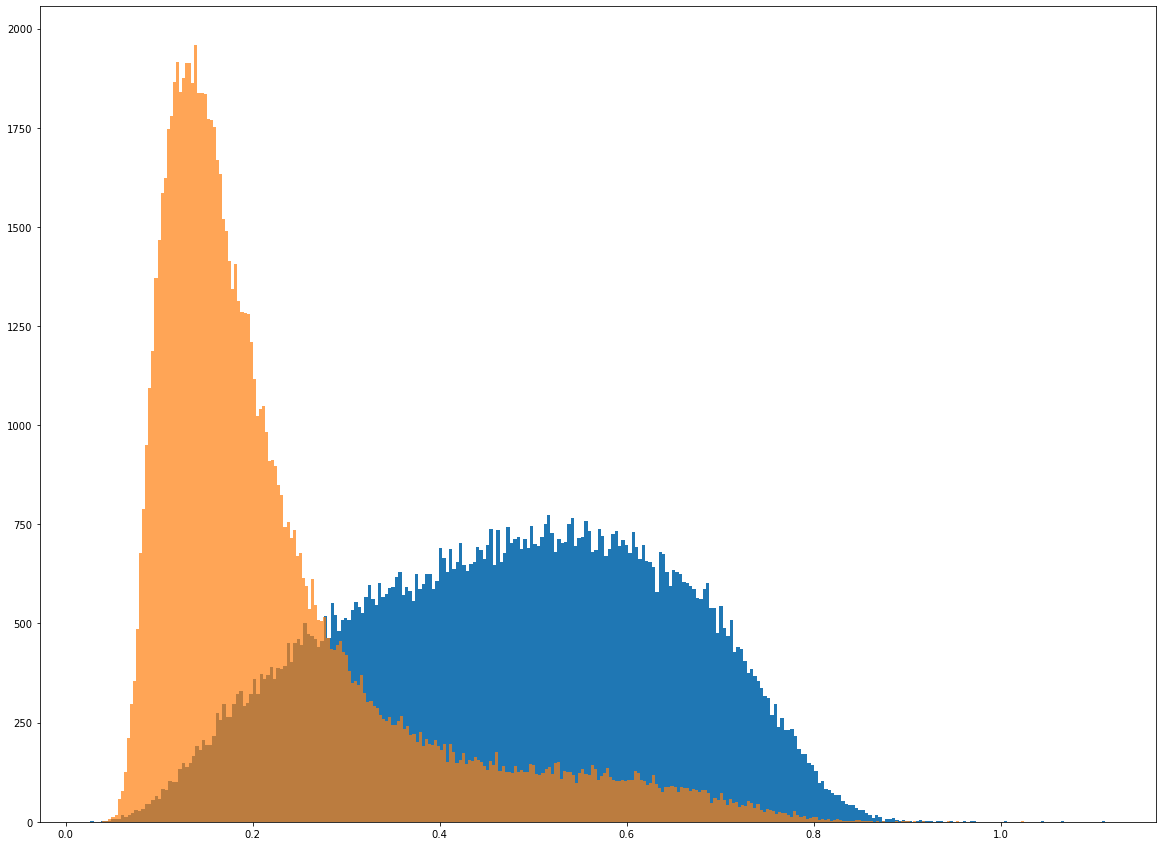

In [23]:
plt.hist(d_qcd['t3'], 300)
plt.hist(d_higgs['t3'], 300, alpha=0.7)
plt.show()

In [24]:
tau_3_qcd_i = np.where((d_qcd['t3'] >= min(list(d_higgs['t3']))) & (d_qcd['t3'] < 0.075))
tau_3_h_i = np.where((d_higgs['t3'] >= min(list(d_higgs['t3']))) & (d_higgs['t3'] < 0.075))
qcd_mean = np.mean([d_qcd['t3'][x] for x in tau_3_qcd_i])
higgs_mean = np.mean([d_higgs['t3'][x] for x in tau_3_h_i])
prob = stats.poisson.cdf(higgs_mean, qcd_mean)
sig = stats.norm.ppf(prob)
old_prob = stats.poisson.cdf(np.mean(d_higgs['t3']),np.mean(d_qcd['t3']))
old_sig = stats.norm.ppf(old_prob)
x_sig = 100/np.sqrt(20000)
print('Significance pre cut: {:.3} Significance: {:.3} Expected Significance: {:.3}'.format(old_sig, sig, x_sig))

Significance pre cut: 0.308 Significance: 1.54 Expected Significance: 0.707


From using the same cuts as with $\tau_2$, $\tau_3$ seems to be just as effective.

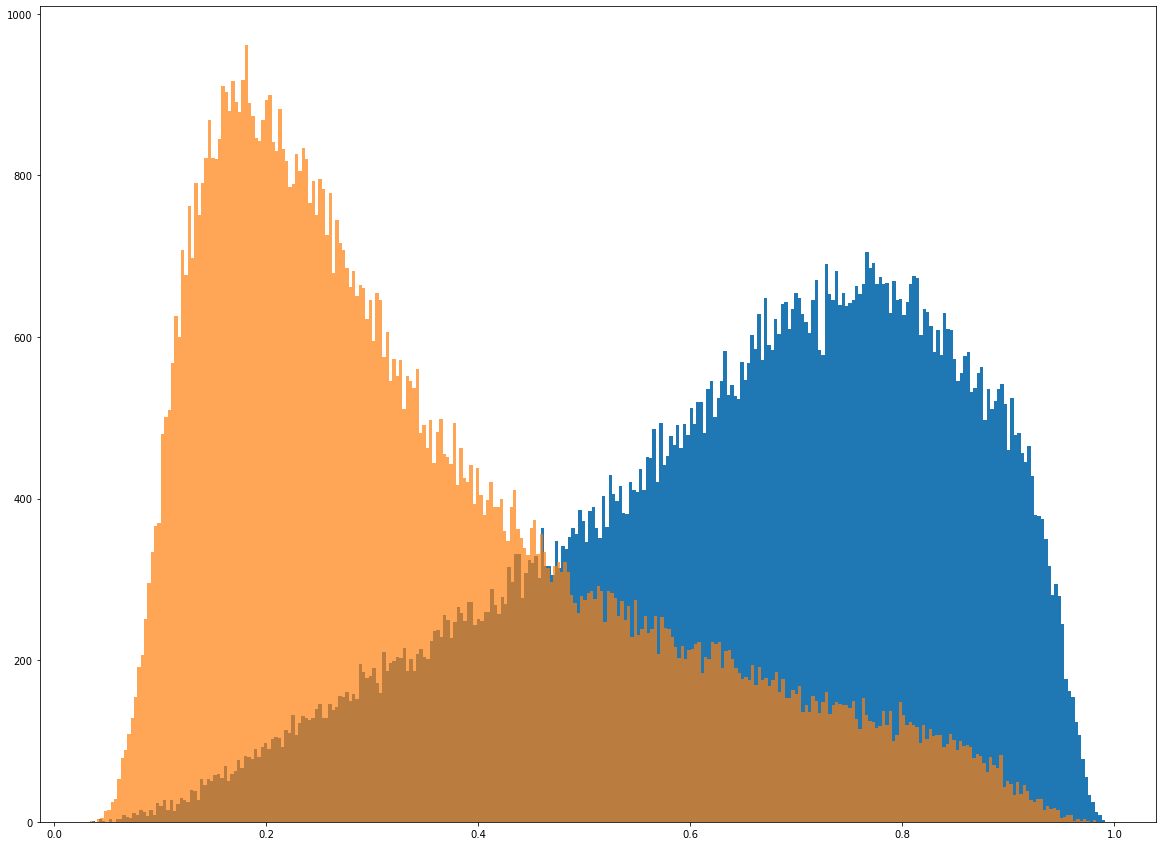

In [25]:
plt.hist(d_qcd['t21'], 300)
plt.hist(d_higgs['t21'], 300, alpha=0.7)
plt.show()

In [26]:
tau_21_qcd_i = np.where((d_qcd['t21'] < 0.05) | (d_qcd['t21'] > 0.95))
tau_21_h_i = np.where((d_higgs['t21'] < 0.05)  | (d_higgs['t21'] > 0.95))
qcd_mean = np.mean([d_qcd['t21'][x] for x in tau_21_qcd_i])
higgs_mean = np.mean([d_higgs['t21'][x] for x in tau_21_h_i])
prob = stats.poisson.cdf(higgs_mean, qcd_mean)
sig = stats.norm.ppf(prob)
old_prob = stats.poisson.cdf(np.mean(d_higgs['t21']),np.mean(d_qcd['t21']))
old_sig = stats.norm.ppf(old_prob)
x_sig = 100/np.sqrt(20000)
print('Significance pre cut: {:.3} Significance: {:.3} Expected Significance: {:.3}'.format(old_sig, sig, x_sig))

Significance pre cut: 0.0563 Significance: -0.294 Expected Significance: 0.707


To my surprise, $\tau_{21}$ turned out to be a poor feature for signal optimization. This is likely due to the fact that the signal distribution is so much wider than the previous two features we looked at. As a result, even the most common values for a signal reading are not significantly more likely than background data of the same value, thus driving down its significance. Feel free to ignore the following cells until the next text box, attempted to fit a DNN to the dataset, but it couldn't find any patterns between the data and was just flipping coins. Don't know if it's a problem with the model or the data I'm giving it, probably the latter though I was hoping the cuts I made would help it find trends. Since it doesn't really do what I want at all I won't be using this for part 8, though it was good experience performing preprocessing with real data (even if everything below this is code gore).

In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random

In [28]:
# Cuts made to data
mass_cut_q_i = np.where(d_qcd['mass'] < max(list(d_higgs['mass'])))
tau_2_qcd_i = np.where((d_qcd['t2'] >= 0.15) & (d_qcd['t2'] < 0.22))
tau_2_h_i = np.where((d_higgs['t2'] >= 0.15) & (d_higgs['t2'] < 0.22))
tau_3_qcd_i = np.where((d_qcd['t3'] >= 0.15) & (d_qcd['t3'] < 0.22))
tau_3_h_i = np.where((d_higgs['t3'] >= 0.15) & (d_higgs['t3'] < 0.22))
print(mass_cut_q_i[0].shape,tau_2_qcd_i[0].shape,tau_2_h_i[0].shape,tau_3_qcd_i[0].shape,tau_3_h_i[0].shape)

# Cuts were returned as tuples for whatever reason so redifining as np.ndarrays
mass_cut_q_i, tau_2_qcd_i, tau_2_h_i, tau_3_qcd_i, tau_3_h_i = mass_cut_q_i[0], tau_2_qcd_i[0], tau_2_h_i[0], tau_3_qcd_i[0], tau_3_h_i[0]

# Ensure the data used is the result of all cuts by finding intersection of each set of indices
qcd_intersect = np.intersect1d(tau_2_qcd_i,tau_3_qcd_i)
qcd_intersect = np.intersect1d(qcd_intersect,mass_cut_q_i)
# Adding random qcd events as the ratio of qcd to higgs events was very low as a result of the cuts; could be source of confusion for model?
choices = [random.choice(range(100000)) for _ in range(10000)]
qcd_intersect = np.append(qcd_intersect, choices)
print(qcd_intersect.shape)
h_intersect = np.intersect1d(tau_2_h_i, tau_3_h_i)
print(h_intersect.shape)

# Turn indices into arrays with 3 dimensions for each feature
qcd_x = np.append(np.array([d_qcd['mass'][x] for x in qcd_intersect]).reshape(-1,1),np.array([d_qcd['t2'][x] for x in qcd_intersect]).reshape(-1,1),axis=1)
qcd_x = np.append(qcd_x, np.array([d_qcd['t3'][x] for x in qcd_intersect]).reshape(-1,1),axis=1)

h_x = np.append(np.array([d_higgs['mass'][x] for x in h_intersect]).reshape(-1,1), np.array([d_higgs['t2'][x] for x in h_intersect]).reshape(-1,1),axis=1)
h_x = np.append(h_x, np.array([d_higgs['t3'][x] for x in h_intersect]).reshape(-1,1),axis=1)

# Define labels and seperate into training/testing sets
train_x = np.append(h_x, qcd_x, axis=0)
train_y = np.append(np.ones_like(h_intersect), np.zeros_like(qcd_intersect))
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, shuffle=True, test_size=0.2)

(85387,) (2622,) (23897,) (5771,) (28708,)
(10756,)
(9806,)


In [29]:
# Define hyperparameters
epochs = 20
lr = 0.1

loss_fun = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [30]:
def classifier():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(3,)))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss=loss_fun, metrics=['accuracy'])
    return model

In [31]:
ml_classifier=classifier()
ml_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 42,241
Trainable params: 42,241
Non-trainable params: 0
_________________________________________________________________


In [32]:
# "Training" :(
history = ml_classifier.fit(train_x, np.array(train_y), validation_data=(test_x,np.array(test_y)), verbose=1, epochs=epochs)

Epoch 1/20
515/515 [==============================] - 2s 2ms/step - loss: 2.2340 - accuracy: 0.5068 - val_loss: 0.6978 - val_accuracy: 0.5337
Epoch 2/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5072 - val_loss: 0.6932 - val_accuracy: 0.5337
Epoch 3/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5039 - val_loss: 0.6979 - val_accuracy: 0.5337
Epoch 4/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5122 - val_loss: 0.6966 - val_accuracy: 0.5337
Epoch 5/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5123 - val_loss: 0.6943 - val_accuracy: 0.4663
Epoch 6/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5071 - val_loss: 0.6917 - val_accuracy: 0.5337
Epoch 7/20
515/515 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5133 - val_loss: 0.6914 - val_accuracy: 0.5337
Epoch 

Having made all the cuts I could reasonably come up with, let's begin our search for signal and the significance of said signal within the pseudo-experiment data. We'll begin again with mass and work our way down through the different features we used to make cuts as those will be the most discriminatory in our search. Since we have 40,344 events, we'll scale our original dataset down to ~40,000 QCD events and ~500 Higgs events (it lines up better) when plotting alongside.

In [33]:
import pandas as pd
high_l = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_l = pd.read_hdf('data_lowLumi_pt_250_500.h5')
qcd_factor = 0.4
higgs_factor = 0.005

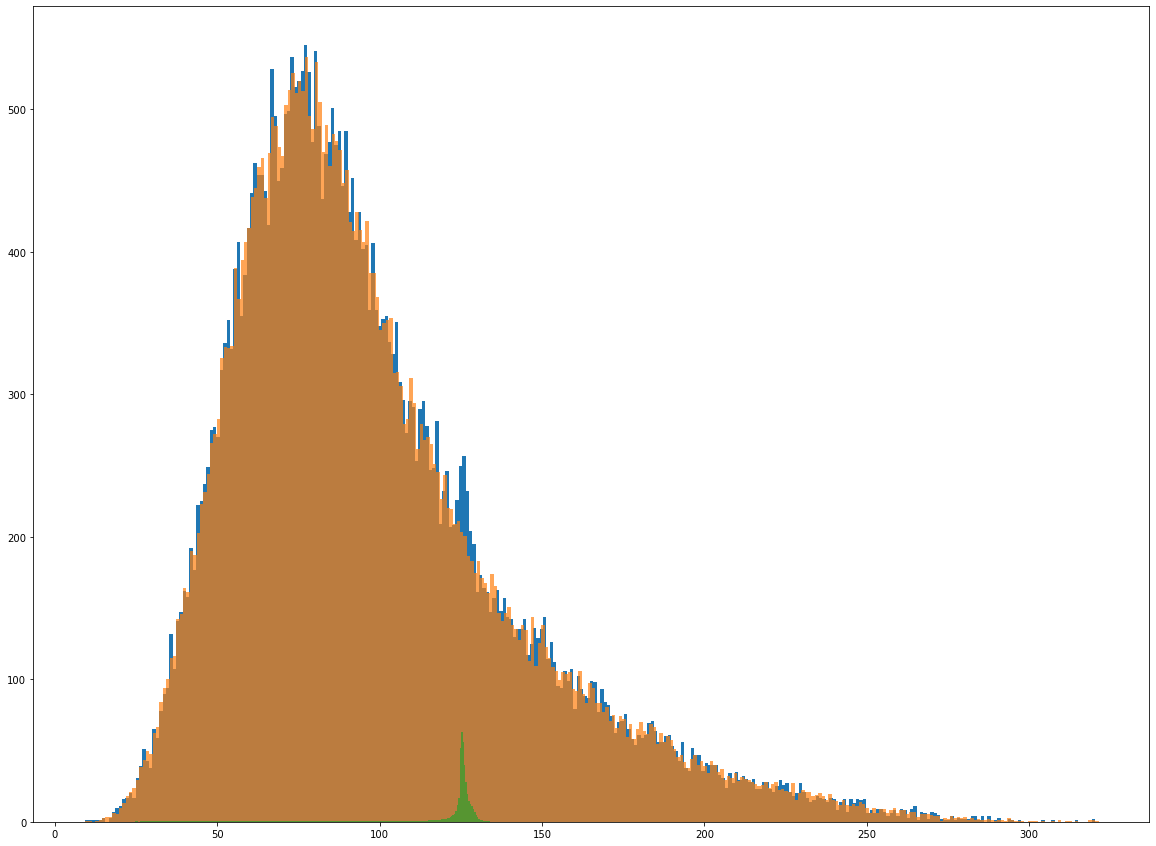

In [34]:
plt.hist(high_l['mass'], 300)
plt.hist(d_qcd['mass'], 300, weights=qcd_factor*np.ones_like(d_qcd['mass']), alpha=0.7)
plt.hist(d_higgs['mass'], 300, weights=higgs_factor*np.ones_like(d_higgs['mass']), alpha=0.7)
plt.show()

It's clearly visible here that there's a spike directly where the expected Higgs values are, indicating the presence of signal at this point (125 GeV). Using the same significance evaluation as earlier, let's find the significance of a signal at 125 GeV before any cuts are selected.

In [35]:
mass_mean = np.mean(np.array(high_l['mass']))
prob = stats.poisson.cdf(125, mass_mean)
sig = stats.norm.ppf(prob)
x_sig = 100/np.sqrt(20000)
print('Significance: {:.4} Expected Significance: {:.3}'.format(sig, x_sig))

Significance: 2.701 Expected Significance: 0.707


Already before making any cuts we have a significance of 2.701 which is already quite good since mass is so easily discriminatory. Let's see how it improves after making the cuts that we decided on earlier.

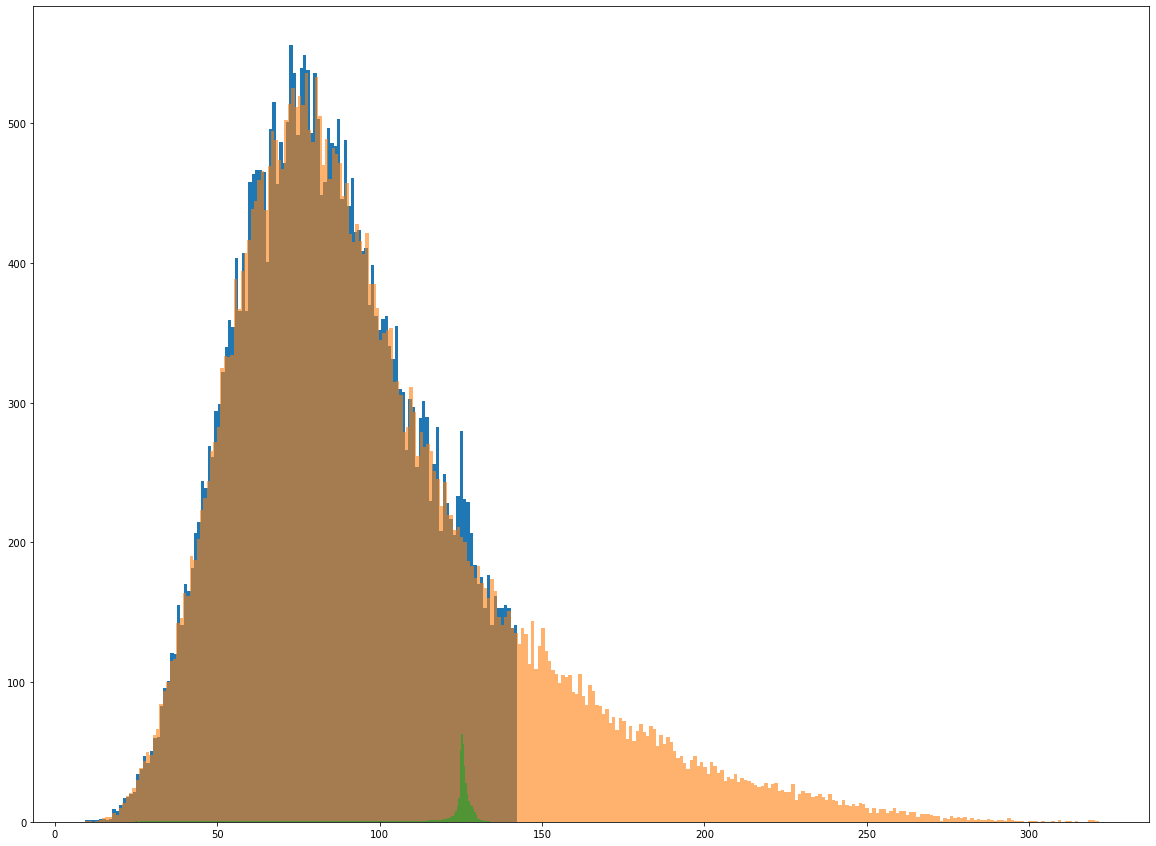

Significance: 4.247 Expected Significance: 0.707


In [36]:
cut_mass = np.array(high_l['mass'])
cut_i = np.where(cut_mass < max(list(d_higgs['mass'])))
cut_mass = cut_mass[cut_i[0]]
cut_mean = np.mean(cut_mass)
prob = stats.poisson.cdf(125, cut_mean)
sig = stats.norm.ppf(prob)
plt.hist(cut_mass, 127)
plt.hist(d_qcd['mass'], 300, weights=qcd_factor*np.ones_like(d_qcd['mass']), alpha=0.6)
plt.hist(d_higgs['mass'], 300, weights=higgs_factor*np.ones_like(d_higgs['mass']), alpha=0.7)
plt.show()
print('Significance: {:.4} Expected Significance: {:.3}'.format(sig, x_sig))

From one simple cut, we've already increased our significance to 4.247 sigma (assuming the raw poisson distribution is a close enough estimate)! Mass is quite good at rooting out signal, even if this isn't a significant enough discovery to warrant publishing a paper. Let's see how the cuts we made to our other features work in practice.

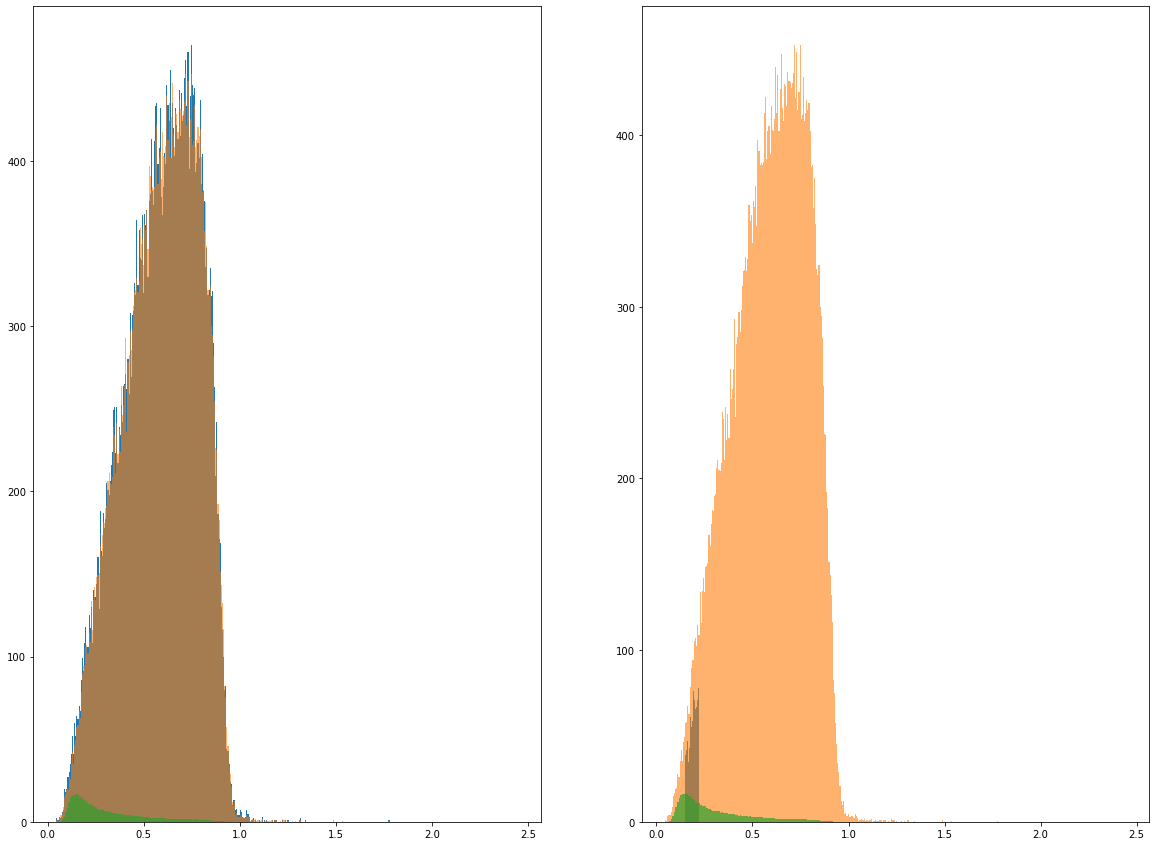

Pre Cut Significance: 0.1383 Significance: 0.944 Expected Significance: 0.707


In [37]:
cut_t2 = np.array(high_l['t2'])
cut_i = np.where((cut_t2 >= 0.15) & (cut_t2 < 0.22))
cut_t2 = cut_t2[cut_i[0]]
cut_mean = np.mean(cut_t2)
pre_cut_mean = np.mean(np.array(high_l['t2']))
pre_cut_prob = stats.poisson.cdf(0.15, pre_cut_mean)
pre_cut_sig = stats.norm.ppf(pre_cut_prob)
prob = stats.poisson.cdf(.15, cut_mean)
sig = stats.norm.ppf(prob)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(high_l['t2'], 300)
ax1.hist(d_qcd['t2'], 300, weights=qcd_factor*np.ones_like(d_qcd['t2']), alpha = 0.6)
ax1.hist(d_higgs['t2'], 300, weights=higgs_factor*np.ones_like(d_higgs['t2']), alpha=0.7)
ax2.hist(cut_t2, 20)
ax2.hist(d_qcd['t2'], 300, weights=qcd_factor*np.ones_like(d_qcd['t2']), alpha=0.6)
ax2.hist(d_higgs['t2'], 300, weights=higgs_factor*np.ones_like(d_higgs['t2']), alpha=0.7)
plt.show()
print('Pre Cut Significance: {:.4} Significance: {:.4} Expected Significance: {:.3}'.format(pre_cut_sig, sig, x_sig))

The cuts made here are rather interesting... One would think that moving the means farther apart would result in a greater increase in significance, however for whatever reason it seems that reducing the background to only a small sliver of its former size close to the signal mean results in the greatest increase of significance. It also becomes more clear that the spike on the left side of the cut background is representative of the signal given that it's centered right on the signal peak. These cuts however are not that significant both in absolute and also compared to the expected significance.

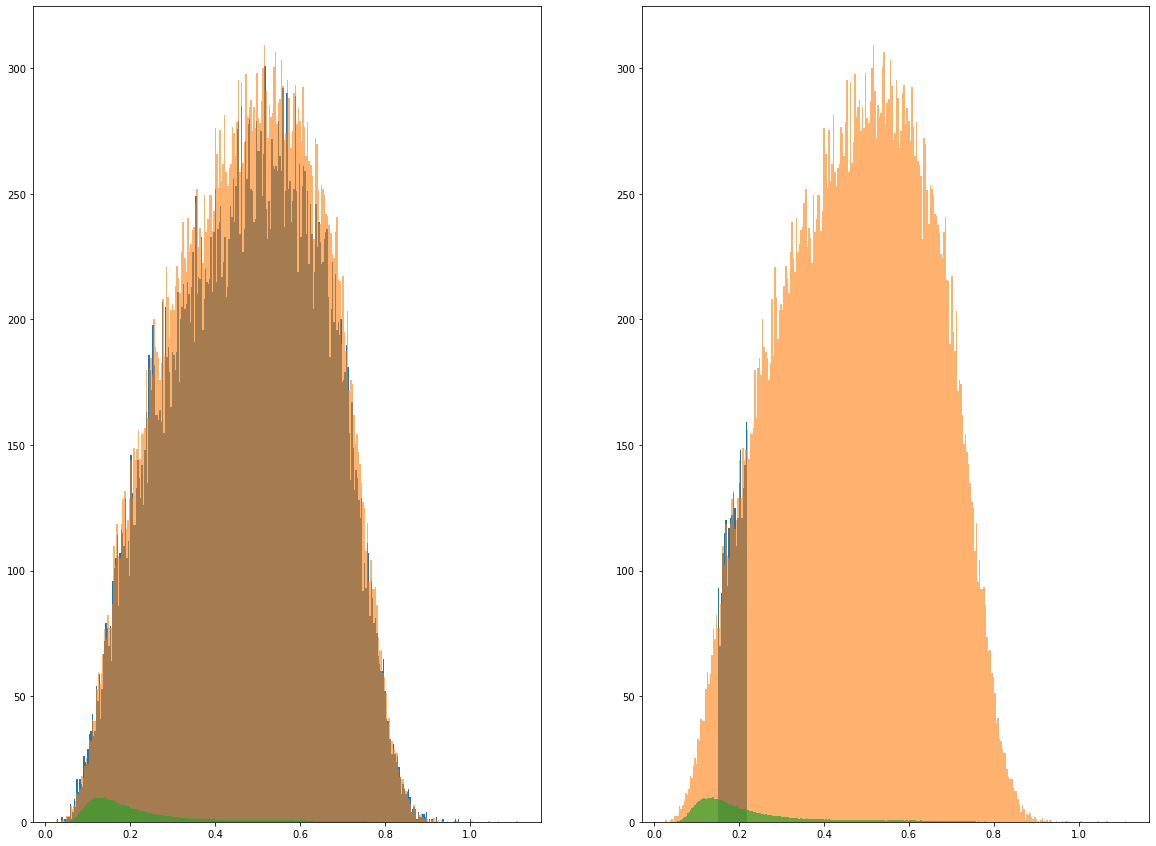

Pre Cut Significance: 0.3101 Significance: 0.9488 Expected Significance: 0.707


In [38]:
cut_t3 = np.array(high_l['t3'])
cut_i = np.where((cut_t3 >= 0.15) & (cut_t3 < 0.22))
cut_t3 = cut_t3[cut_i[0]]
cut_mean = np.mean(cut_t3)
pre_cut_mean = np.mean(np.array(high_l['t3']))
pre_cut_prob = stats.poisson.cdf(0.15, pre_cut_mean)
pre_cut_sig = stats.norm.ppf(pre_cut_prob)
prob = stats.poisson.cdf(.15, cut_mean)
sig = stats.norm.ppf(prob)


fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(high_l['t3'], 300)
ax1.hist(d_qcd['t3'], 300, weights=qcd_factor*np.ones_like(d_qcd['t3']), alpha = 0.6)
ax1.hist(d_higgs['t3'], 300, weights=higgs_factor*np.ones_like(d_higgs['t3']), alpha=0.7)
ax2.hist(cut_t3, 20)
ax2.hist(d_qcd['t3'], 300, weights=qcd_factor*np.ones_like(d_qcd['t3']), alpha=0.6)
ax2.hist(d_higgs['t3'], 300, weights=higgs_factor*np.ones_like(d_higgs['t3']), alpha=0.7)
plt.show()
print('Pre Cut Significance: {:.4} Significance: {:.4} Expected Significance: {:.3}'.format(pre_cut_sig, sig, x_sig))

The calculated significance for $\tau_3$ is almost identical to that of $\tau_2$, this is unsurprising as this is essentially the results we saw when performing our analysis of cuts upon the simulated higgs and QCD data. Again, we see our signal present on the left edge of our cut background however this time it's much more slight. The signal is previously not obvious before cuts are made, however this is still not a very significant result. In any case, let's now test these cuts against the low luminosity data set and compare. We'll need to change our scaling factor since there are only 4060 events in the low luminosity dataset.

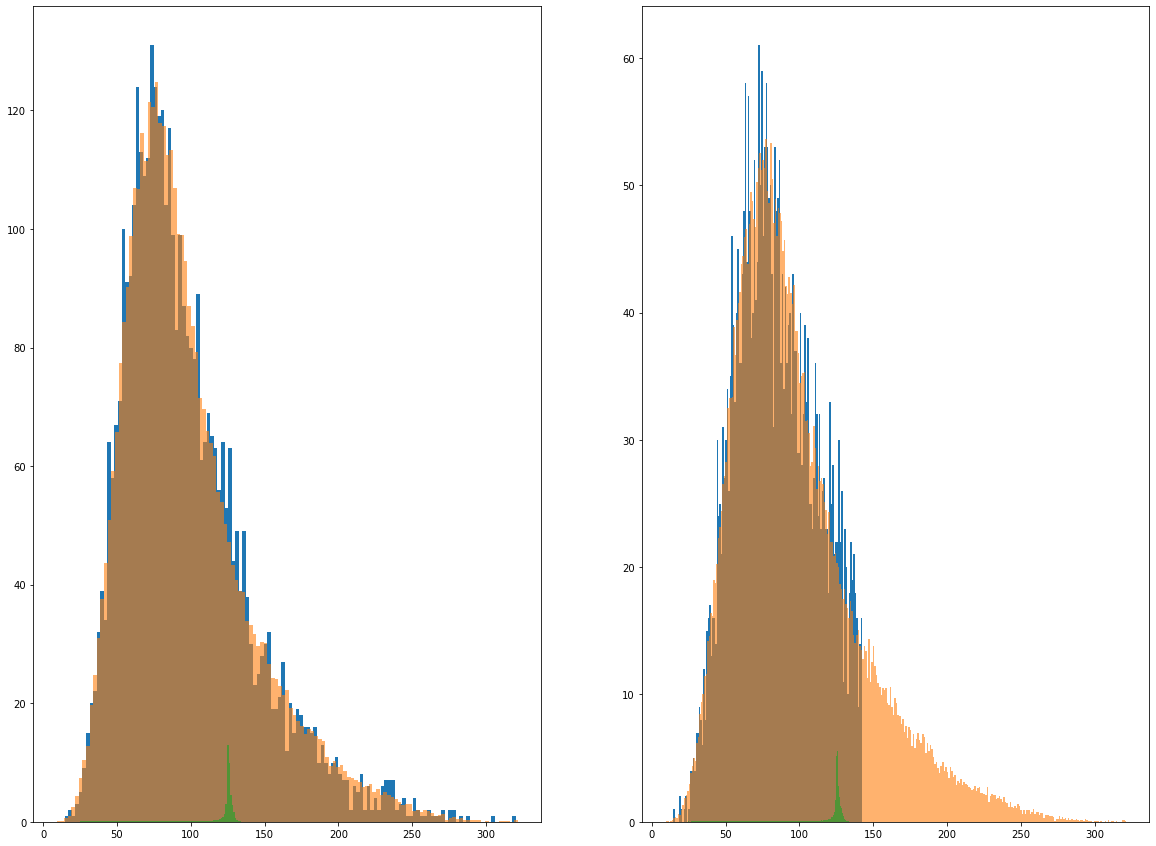

Pre Cut Significance: 2.766 Significance: 4.211 Expected Significance: 0.707


In [39]:
qcd_factor = 0.04
higgs_factor = 0.0005

cut_mass = np.array(low_l['mass'])
cut_i = np.where(cut_mass < max(list(d_higgs['mass'])))
cut_mass = cut_mass[cut_i[0]]
cut_mean = np.mean(cut_mass)
pre_cut_mean = np.mean(np.array(low_l['mass']))
pre_cut_prob = stats.poisson.cdf(125, pre_cut_mean)
pre_cut_sig = stats.norm.ppf(pre_cut_prob)
prob = stats.poisson.cdf(125, cut_mean)
sig = stats.norm.ppf(prob)


fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(low_l['mass'], 127)
ax1.hist(d_qcd['mass'], 127, weights=qcd_factor*np.ones_like(d_qcd['mass']), alpha = 0.6)
ax1.hist(d_higgs['mass'], 127, weights=higgs_factor*np.ones_like(d_higgs['mass']), alpha=0.7)
ax2.hist(cut_mass, 127)
ax2.hist(d_qcd['mass'], 300, weights=qcd_factor*np.ones_like(d_qcd['mass']), alpha=0.6)
ax2.hist(d_higgs['mass'], 300, weights=higgs_factor*np.ones_like(d_higgs['mass']), alpha=0.7)
plt.show()
print('Pre Cut Significance: {:.4} Significance: {:.4} Expected Significance: {:.3}'.format(pre_cut_sig, sig, x_sig))

With the low luminosity dataset, the signal is much more hidden within the data, yet despite this, the calculated significance hardly changes at all. This is *probably* indicative of a problem with the way I've been calculating significance for the entire lab and unfortunately even if I spent the time to come up with a better way this would be a long manual fix to go back through due to the way I programmed the lab. However I do understand that the significance should go down as a result of the smaller sample size, so an improved/correct significance calculation would certainly relate the background/signal means to the number of events/number of expected events. Even more unfortunate is that every cut was made using this significance calculation so it's also possible that I've been using suboptimal cuts as well, not to mention it could be the source of the problem with the classifier model. Alas at this point in time I do not have time to fix this problem. Regardless, it's fairly straightfoward to extrapolate that the same situation will occur for the n-subjetiness variables when calculating significance using the low luminosity dataset. At this point its best to move on to the confidence interval calculations.

In calculating the confidence interval, we'll use the expected yields from the higgs dataset we were given at the start, and find the observed using the low luminosity dataset. I'll be approximating the distribution as a gaussian with a lower bound of 118.

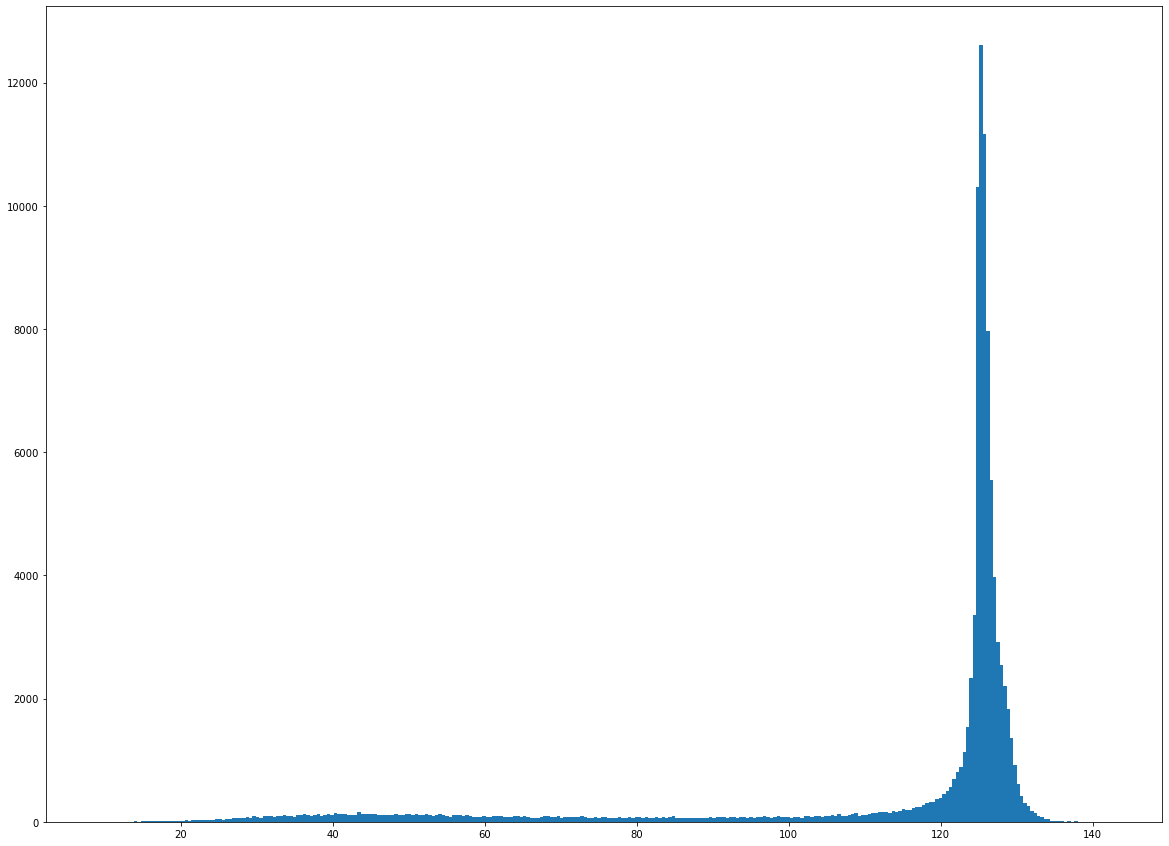

In [40]:
plt.hist(d_higgs['mass'], 300)
plt.show()

In [41]:
vals = [x for x in d_higgs['mass'] if x >=118]
stdev = np.std(vals)
critical_z = 1.96 # For 95% confidence
sqrt_sample_n = np.sqrt(len(vals))

ci = critical_z*(stdev/sqrt_sample_n)
print(ci, np.mean(vals))

0.014666645461268097 125.77217710615201


With an expected confidence interval of 0.014, this indicates that we can be 95% sure the true mean of our population lies within our upper bound of 125.8. Let's see how this compares to the observed upper bound of our confidence interval with the low luminosity data.

In [42]:
o_vals = [x for x in np.array(low_l['mass']) if (x > 118) and (x < max(vals))]
stdev = np.std(o_vals)
critical_z = 1.96 # For 95% confidence
sqrt_sample_n = np.sqrt(len(o_vals))

ci = critical_z*(stdev/sqrt_sample_n)
print(ci, np.mean(o_vals))

0.604954421337179 128.98986688822106


According to the sample we've taken from the low luminosity data, there's a 95% chance the true mean lies within our upper bound of 129.6. This confidence interval doesn't overlap with our expected interval. This could be due to two reasons. First, there's always the 5% chance that the sample taken really does lie outside the confidence interval. The second reason is more likely, which is the contamination of background in the low luminosity sample. The increase in the number of events decreases the spread of the confidence interval, which would cause the two intervals to not overlap, whereas if we sampled only signal events, its much more likely that our confidence intervals would in fact overlap.